In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pickle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [50]:
x_treino, x_teste, y_treino, y_teste = pd.read_pickle('dados.pkl')

In [51]:
dt = DecisionTreeClassifier()
dt.fit(x_treino, y_treino)
dt_pred = dt.predict(x_teste)

print(classification_report(y_teste, dt_pred))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [52]:
accuracy_score(y_teste, dt_pred)

In [80]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_teste, dt_pred).ravel()

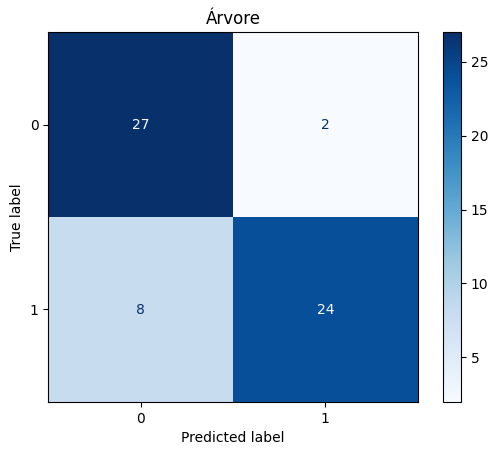

In [53]:
cm = confusion_matrix(y_teste, dt_pred)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Árvore")
plt.show()

In [54]:
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.001, 0.01]
}

tree_R = DecisionTreeClassifier()

random_search = RandomizedSearchCV(estimator=tree_R,
                                   param_distributions=param_distributions,
                                   n_iter=100,  # Número de combinações a testar
                                   cv=5,  # Número de folds para cross-validation
                                   random_state=42,
                                   n_jobs=-1) 

random_search.fit(x_treino, y_treino)
tree_best = random_search.best_estimator_

y_pred_random_search = tree_best.predict(x_teste)

In [55]:
print(classification_report(y_teste, y_pred_random_search))

              precision    recall  f1-score   support

           0       0.68      0.93      0.78        29
           1       0.90      0.59      0.72        32

    accuracy                           0.75        61
   macro avg       0.79      0.76      0.75        61
weighted avg       0.80      0.75      0.75        61



In [56]:
accuracy_score(y_teste, y_pred_random_search)

In [76]:
tn2, fp2, fn2, tp2 = confusion_matrix(y_teste, y_pred_random_search).ravel()

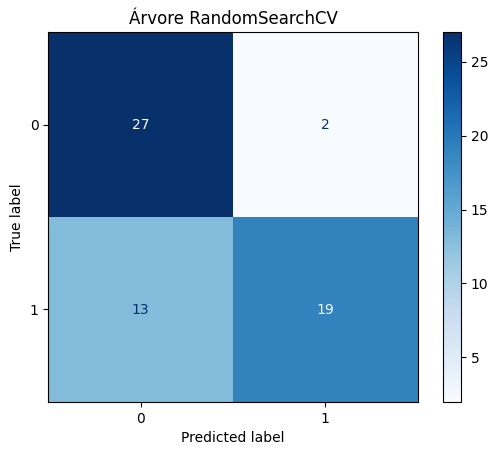

In [57]:
cm = confusion_matrix(y_teste, y_pred_random_search)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Árvore RandomSearchCV")
plt.show()

In [58]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Função de avaliação de divisão
    'splitter': ['best', 'random'],    # Método de escolha de split
    'max_depth': [ None, 10, 20, 30],   # Profundidade máxima da árvore
    'min_samples_split': [ 2, 5, 10],   # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4],     # Mínimo de amostras para uma folha
    'max_features': [None, 'sqrt', 'log2'],  # Número de features para split
    'max_leaf_nodes': [None, 10, 20, 30],    # Número máximo de nós folhas
    'min_impurity_decrease': [0.0, 0.001, 0.01]  # Redução mínima de impureza
}

tree_G = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=tree_G,
                           param_grid=param_grid,
                           cv=5,    # Cross-validation com 5 folds
                           n_jobs=-1)  # Paralelizar com múltiplos núcleos

grid_search.fit(x_treino, y_treino)

tree = grid_search.best_estimator_
y_pred_grid = tree.predict(x_teste)

In [59]:
print(classification_report(y_teste, y_pred_grid))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        29
           1       0.88      0.66      0.75        32

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



In [60]:
accuracy_score(y_teste, y_pred_grid)

In [77]:
tn3, fp3, fn3, tp3 = confusion_matrix(y_teste, y_pred_grid).ravel()

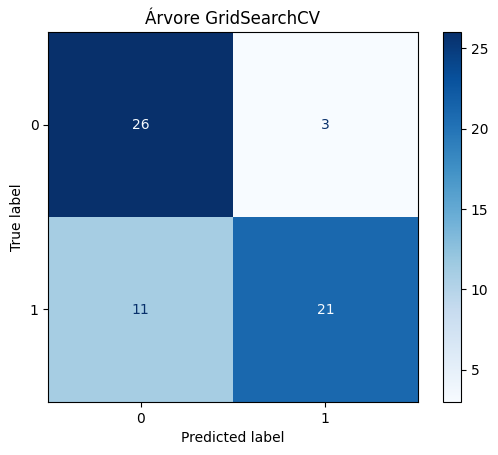

In [61]:
cm = confusion_matrix(y_teste, y_pred_grid)

# Plotar a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Árvore GridSearchCV")
plt.show()

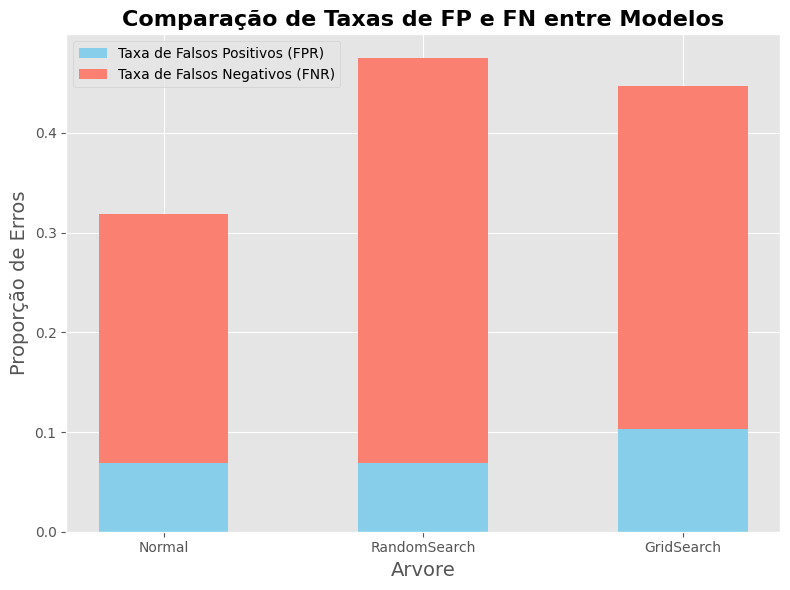

In [93]:
import numpy as np


fpr_modelos = [
    fp1 / (fp1 + tn1),
    fp2 / (fp2 + tn2),
    fp3 / (fp3 + tn3)
]

fnr_modelos = [
    fn1 / (fn1 + tp1),
    fn2 / (fn2 + tp2),
    fn3 / (fn3 + tp3)
]

modelos = ['Normal', 'RandomSearch', 'GridSearch']
cores = ['blue', 'green', 'red']

plt.style.use('ggplot')

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
bar_width = 0.5
bar_positions = np.arange(len(modelos))
plt.bar(bar_positions, fpr_modelos, color='skyblue', label='Taxa de Falsos Positivos (FPR)', width=bar_width)
plt.bar(bar_positions, fnr_modelos, bottom=fpr_modelos, color='salmon', label='Taxa de Falsos Negativos (FNR)', width=bar_width)

# Adicionar títulos e rótulos
plt.title('Comparação de Taxas de FP e FN entre Modelos', fontsize=16, fontweight='bold')

plt.xlabel('Arvore', fontsize=14)

plt.ylabel('Proporção de Erros', fontsize=14)
plt.xticks(bar_positions, modelos)

# Adicionar uma legenda
plt.legend(loc='upper left', fontsize=10)


# Exibir o gráfico
plt.tight_layout()
plt.show()

In [95]:
print(fnr_modelos[0], fnr_modelos[2])

0.25 0.34375
